<a href="https://www.kaggle.com/code/avikumart/regression-ipl-eda-and-prediction-r2-96?scriptVersionId=190318126" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

> The Indian Premier League (IPL), also officially known as TATA IPL for sponsorship reasons is a professional men's Twenty20 cricket league, contested by ten teams based out of ten Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

>The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.

>The 2020 IPL season set a massive viewership record with 31.57 million average impressions and with an overall consumption increase of 23 per cent from the 2019 season

> In this notebook, we have taken dataset of players' statistics from 2008 to 2013 to analyse and visulise data. also, we will see what factors affect the sold price of players

### Exploratory Data Analysis at a Glance

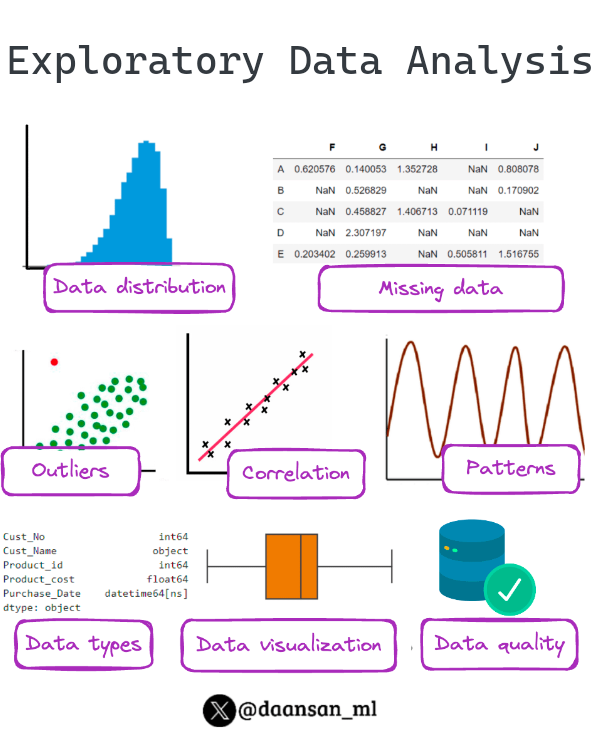


- Exploratory Data Analysis (EDA) is a process used for investigating your data to discover patterns, anomalies, relationships, or trends using statistical summaries and visual methods.
- It is essential for understanding the data's underlying structure and characteristics before applying more formal statistical or Machine Learning methods.

**Some key points that we should normally check are**

- Assessing the distribution of data (e.g., normal, skewed) using histograms, box plots, and summary statistics helps understand the central tendency and variability.
- Identifying and addressing missing data is crucial, as it can significantly affect analyses. Techniques include imputation, deletion, or understanding the reasons for missingness.
- Detecting and examining outliers to understand their impact on the dataset and deciding how to handle them (e.g., removal, transformation).
- Analyzing correlations between variables using correlation coefficients and scatter plots to identify relationships and potential dependencies.
- Looking for patterns, trends, or anomalies in the data, which can be visualized using line graphs, bar charts, or time-series analysis.
- Univariate, Bi-variate and Multivariate data analysis and visualization.

**Source: David Andras** 

# Feature Description


1. **PLAYER NAME** - Name of the players in IPL
2. **AGE** - Age group of each players, there are 3 groups of players, 1/2/3
3. **COUNTRY** - Home country of each players 
4. **TEAM** - IPL team they belong to
5. **PLAYING ROLE** - Players role, bowlers/batman/all-rounder/Wicket-keeper
6. **T-RUNS** - Run scored in test matches
7. **T=WKTS** - Wickets taken in test matches
8. **ODI-RUNS-S** - Run scored in ODIs
9. **ODI-SR-B** - Strike rate in ODIs
10. **ODI-WKTS** - Wickets taken in ODIs
11. **ODI-SR-BL** - Bowling strike rate in ODIs
12. **CAPTAINCY EXP** - whether the player has any captaincy experience or not
13. **RUNS-S** - Number of runs scored by a player
14. **HS** - Highest score by batman in IPL
15. **AVE** - Average runs scored by the batsman in IPL
16. **SR-B** - Batting strike rate in IPL
17. **SIXERS** - Number of six runs scored by a player in IPL
18. **RUNS-C** - Number of runs conceded by a player
19. **WKTS** - Number of wickets taken by a player in IPL
20. **AVE-BL** - Bowling average in IPL
21. **ECON** - Economy rate of a bowler
22. **SR-BL** - Bowling strike rate in IPL
23. **AUCTION YEAR** - Year of auction
24. **BASE PRICE** - Base price of a player
25. **SOLD PRICE** - Sold price of a player

# Objective of the this project:-

**> Exploratory data analysis to find insights on IPL players**

 
**> Regression model to see which factors effects a lot in players' sold price**

**> Importing liabraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Descriptive and Exploratory data analysis

In [ ]:
df = pd.read_csv('/kaggle/input/ipledadataset/IPL IMB381IPL2013.csv', index_col=0)
df.head()

In [ ]:
print("shape of the dataset: ", df.shape)
print("""--------------------------------------
-----------------------------------------""")
print(df.info())

In [ ]:
# Dividing categorical and numerical columns
print("Columns names are as below: \n",df.columns)
print("-------------------------------------------------------------------------------")
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype in ['float64','int64']]
print("categorical columns: ", cat_col)
print("-------------------------------------------------------------------------------")
print("numerical columns: ", num_col)

In [ ]:
df.describe().T.sort_values(by='std', ascending=False)\
.style.background_gradient(cmap='GnBu')

In [ ]:
# Count the values in each categorical variable
for col in cat_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())
print("----------------------------------------------------")
# count the values in each numerical variable:
for col in num_col:
    print("total unique values in {} column: ".format(col), df[col].nunique())

In [ ]:
# count of players by country, team and playing role
cols = ['COUNTRY','TEAM','PLAYING ROLE']

def cat_plt_func(cols_list):
    for idx, col in enumerate(cols):
        plt.figure(idx, figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.title("Count of players by {}".format(col))
        plt.ylabel("Number of players by {}".format(col))
        plt.grid()
        plt.show() 

        
cat_plt_func(cols)

> Indian players are higest followed by Australia

> Bolwers are highest across the teams 

> CSK has a maximum number of players

In [ ]:
#heatmap of numerical columns
plt.figure(figsize=(12,12))
sns.heatmap(data=df[num_col].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

> There's high correlation between 'Run-s', 'HS', 'avg', 'sr-b' and 'sixers'

> 'Sixers' and 'Run-s' correlates with sold price

> Base price is also in correlation with sold price

> 'HS', 'AVE', 'Captaincy Exp' and 'ODI-runs-S' moderatly correlates with sold price

In [ ]:
cols = ['COUNTRY','TEAM','PLAYING ROLE']
for idx, col in enumerate(cols):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=col, y='SOLD PRICE', data=df)
    plt.yticks(list(range(200000,2000000,200000)))
    plt.grid()
    plt.show()    

> Range of all-rounder's sold price is higher compare to others

> Batsmen sold at higher price compared to Wk or bowler

In [ ]:
df['CAPTAINCY EXP'].value_counts()

def cat_func(col):
    plt.figure(figsize=(6,6))
    sns.pointplot(x=col, y='SOLD PRICE', data=df)
    plt.title("Sold price by {}".format(col))
    plt.show()

cat_func('CAPTAINCY EXP')

> players with captaincy exp are sold at high price

In [ ]:
discreat_fea=['AGE','AUCTION YEAR']

for col in discreat_fea:
    cat_func(col)

> Age group depends on sold price while auction year is not must dependent 

> this shows players are sold on basis on their performance and experience 

> we will remove auction year from our model

In [ ]:
new_col = [col for col in num_col if df[col].nunique() > 4]
len(new_col)

fig, ax = plt.subplots(9,2, figsize=(12,15))
for idx, col in enumerate(new_col):
    sns.distplot(x=df[col], 
                 ax=ax[floor(idx/2), 
                       idx%2])
    ax[floor(idx/2), idx%2].grid(visible=True,
                                 color='lightgrey', 
                                 linestyle="--" )
    ax[floor(idx/2), idx%2].set_xlabel(col)
    
plt.suptitle("Distribution of all continuos columns", 
             fontsize=15, 
             fontweight='bold')
fig.tight_layout()
plt.show()    

> Above plots show how continous numerical features are distributed

> As we can see base price is approx normally distributed with less dispersion while sold price is widely dispersed, it says how prices are changed from base to sold

> Workflow

> next steps
plot distribution plot of base and sold price with age group and cap exp as hue

> plot scatter plot between numerical features and sold price 

> plot paiplot between most correlated cols

> prepare dataframe with avg sold price by player role and age

> find ave sold price by cap ex, age and median price by country to add new features

> add new feature using ave price by age or cap exp

> find premium price by sold-base price and add feature

> encode all the cat features to prepare final dataset

> drop players name and auction year column

> drop multi-correlated cols

In [ ]:
# cross tabulation
pd.crosstab(index=df['AGE'], 
            columns=df['PLAYING ROLE'],
            values=df['SOLD PRICE'],
            aggfunc='count')

> we can learn that more number of players are from age group of 2

In [ ]:
x = df[df['CAPTAINCY EXP'] == 0]['SOLD PRICE']

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.distplot(x=df[df['CAPTAINCY EXP'] == 0]['SOLD PRICE'], label='without capt exp', color='r')
sns.distplot(x=df[df['CAPTAINCY EXP'] == 1]['SOLD PRICE'], label='with cap exp', color='g')
plt.xlabel("SOLD PRICE")
plt.xticks(list(range(200000,2000000,200000)),fontsize=13, fontweight='bold')
plt.title("Distribution of sold price by cap exp")
plt.legend()

plt.subplot(2,1,2)
sns.distplot(x=df[df['AGE'] == 1]['SOLD PRICE'], label='Age grp 1', color='r')
sns.distplot(x=df[df['AGE'] == 2]['SOLD PRICE'], label='Age grp 2', color='g')
sns.distplot(x=df[df['AGE'] == 3]['SOLD PRICE'], label='Age grp 3', color='y')
plt.xlabel("SOLD PRICE")
plt.xticks(list(range(200000,2000000,200000)),fontsize=13, fontweight='bold')
plt.title("Distribution of sold price by age group")
plt.legend()

plt.suptitle("Distribution of Sold price by Cap exp and Age group", fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()

> From above plot 1 we can see with captaincy exp players are sold at higher price and more dispersed than without cap exp

>From plot 2 we can learn that younger players are actualy getting sold on higher prices than other age group

In [ ]:
fig, axs = plt.subplots(6,3, figsize=(15,19),constrained_layout=True)
for idx, col in enumerate(new_col):
    axs[floor(idx/3), idx%3].scatter(np.array(df[col]), 
                                     np.array(df['SOLD PRICE']), 
                                     marker='o')
    axs[floor(idx/3), idx%3].set_xlabel(col)
    axs[floor(idx/3), idx%3].set_ylabel('Sold price')
plt.show()   

> Except ECON, SR-BL, AVE-BL, SR-B, ODI-SR-BL all others features are correlating with each other!

> We can see RUN-HS, AVE, HS are most correlating with SOLD PRICE

In [ ]:
# pairplot among most correlating columns
data = df.loc[:,['RUNS-S','HS','AVE','SIXERS','RUNS-C']]
plt.figure(figsize=(6,6))
sns.pairplot(data, 
             height=2, 
             kind='scatter')
plt.show()

> All features highly correlate with each other, that is not good for regression model

In [ ]:
ave_prdf = pd.DataFrame(df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean()).reset_index()
print(ave_prdf)
plt.figure(figsize=(8,6))
sns.barplot(x='AGE', y='SOLD PRICE', hue='PLAYING ROLE', data=ave_prdf)
plt.title("Average sold price by age group and playing role")
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.legend(title='Playing Role')
plt.show()

> We can see how players are sold by age and playing role. 

> In age group 1, average sold price of batsman in higher same as in ag group 2.

> In age group 3, however allrounder are sold at higher price

In [ ]:
av_age = (df.groupby('AGE')['SOLD PRICE'].mean().reset_index()).sort_values(by='SOLD PRICE', 
                                                                            ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x='AGE', y='SOLD PRICE', data=av_age)
plt.title("Average sold price by age group")
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.show()
plt.show()

> Average sols price of age group 1 is higher

# Let's find outliers (or players who got sold at highest price)

In [ ]:
box = plt.boxplot(df['SOLD PRICE'])
caps = [item.get_ydata()[0] for item in box['caps']]
quantiles =[item.get_ydata()[0] for item in box['whiskers']]
median = [item.get_ydata()[0] for item in box['medians']]
outliers = [item.get_ydata() for item in box['fliers']]


print("Distribution sold price has followong property {}".format(box))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Minimum sold price is {} and maximum sold price is {}".format(caps[0],caps[1]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('25th quantils is {} and 75th qunatile is {}'.format(quantiles[0],quantiles[1]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print('Median of the sold price is {}'.format(median[0]))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
print("Outliears in sold price are {}".format(outliers))
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")

In [ ]:
df[df['SOLD PRICE'] > 1350000][['PLAYER NAME','AGE','PLAYING ROLE','SOLD PRICE']].sort_values(by='SOLD PRICE', 
                                                                                              ascending=False)

> Whoop!! Kohli was sold at highest price being of his age group back in 2013

In [ ]:
lis = [row[0] for row in df[df['SOLD PRICE']> 1350000].itertuples(index=True, name=None)]
lis

# Feature engineering

In [ ]:
pre_df = df.copy()
pre_df.drop(['PLAYER NAME','AUCTION YEAR'], inplace=True, axis=1)

pre_df['PREMIUM'] = pre_df['SOLD PRICE'] - pre_df['BASE PRICE']

In [ ]:
cap_df = pre_df.groupby('CAPTAINCY EXP')['SOLD PRICE'].mean().reset_index()

##################################################

combined_df = pd.merge(pre_df, cap_df, how='left', on='CAPTAINCY EXP')
combined_df.rename(columns={'SOLD PRICE_x':'SOLD PRICE',
                    'SOLD PRICE_y':'AVE PRICE BY CAP'}, inplace=True)

##################################################
coun_sp = pre_df.groupby('COUNTRY')['SOLD PRICE'].median().reset_index()
final_df = pd.merge(combined_df, coun_sp, how='left', on='COUNTRY')
final_df.rename(columns={'SOLD PRICE_x':'SOLD PRICE',
                    'SOLD PRICE_y':'AVE PRICE BY COUNTRY'}, inplace=True)

##################################################

encoded_df = pd.get_dummies(final_df, 
                            columns=['COUNTRY', 'TEAM', 'PLAYING ROLE'], 
                            drop_first=True)
######################################################
#removing outliers

lis = [row[0] for row in df[df['SOLD PRICE']> 1350000].itertuples(index=True, name=None)]
after_df = encoded_df.drop(lis, axis=0)

print("Final columns for model training: \n", encoded_df.columns)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Shape of the final dataset: ", encoded_df.shape)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Data types of columns:\n", encoded_df.dtypes)
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Shape of after_df: ", after_df.shape)

# Model building and training to find the best fit line

In [ ]:
train_test_df = after_df.copy()

X = sm.add_constant(train_test_df.drop('SOLD PRICE', axis=1))
y = train_test_df['SOLD PRICE']

X.shape, y.shape

# devide train and test data set

train_X, val_X, train_y, val_y  = train_test_split(X, y, 
                                                   train_size=0.8, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [ ]:
# let's build baseline model

sm_model = sm.OLS(train_y,train_X).fit()
sm_model.summary2()

> Model is over-fitted to the dataset, there is lot of noise in data and we need to remove multi-colinear columns as well as value that are not statistically significant

> We need to check variation inflation factor of all the features and remove all the columsn which will have collinearity

In [ ]:
# vif calculator
def get_vif(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame({'COLUMN':X.columns,
                                 'VIF': vif})
    return vif_factors

vif_factors = get_vif(X)
vif_factors.head(10)

> If VIF is more than 4 then, it is not good and those features are affecting model performance by inflating variance in regression coefficiants

In [ ]:
vif_greater_than_4 = vif_factors[vif_factors.VIF > 4][['COLUMN','VIF']]
vif_greater_than_4[:10]

> Above columns are having VIF more than 4 we need to check multi collinearity from our previous heatmap and pariplot observations

> we will remove columms serial no. 2,4,6,9,8,11,13,14,16,19,22,23,24,25,26,27,29,30,31,48

In [ ]:
columns_keep = ['T-WKTS','HS','WKTS','SR-BL','AVE PRICE BY CAP']

vif_greater_less_4 = list(vif_factors[vif_factors.VIF < 4]['COLUMN'])

#new columns to keep 

new_lis = columns_keep + vif_greater_less_4
X_new = X[new_lis]

get_vif(X_new)[:10]

In [ ]:
# fit the model again
X_train = train_X[new_lis]

sm_model2 = sm.OLS(train_y, X_train).fit()
sm_model2.summary2()

**> R2 is significant up to 86% than previous model**

In [ ]:
# validate on testing dataset

pred_y = sm_model2.predict(val_X[new_lis])

# scoring
def scorer(pred, val):
    RMSE = np.sqrt(mean_squared_error(pred_y,val_y))
    R2 = r2_score(pred_y,val_y)
    return RMSE, R2


print("RMSE and R2 are as follow: ", scorer(pred_y,val_y))

In [ ]:
# P-P plot
def pp_plot(model, title):
    plt.figure(figsize=(8,6))
    probplot = sm.ProbPlot(model.resid)
    probplot.ppplot(line='45')
    plt.title(title)
    plt.show()
pp_plot(sm_model2, 'P-P Plot')

In [ ]:
def get_std_values(val):
    std_val = (val - val.mean())/val.std()
    return std_val

# Residule plot
def residual_plot(fitted, residual, title):
    plt.figure(figsize=(8,6))
    plt.scatter(get_std_values(fitted),
                get_std_values(residual))
    plt.title(title, fontsize=15)
    plt.xlabel("Standardized Fitted values of best-fit line")
    plt.ylabel("Standardized Residula of observations")
    plt.show()
    
residual_plot(sm_model2.fittedvalues, sm_model2.resid, 'Residual plot')

>  As per the residulas plot there are couple of outliers that are affecting the model.

In [ ]:
#influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(sm_model2, ax=ax)
plt.title('Leverage value vs Residuals')
plt.show()

> index number 55 has higher leverage on residuals compared to others

# LR, Ridge, Decision tree & SGD

In [ ]:
# Models dict
X_trn = train_X[new_lis].drop('const', axis=1)
X_tst = val_X[new_lis].drop('const', axis=1)
train_y, val_y

def model_function(mod,**kwargs):
    model = mod(**kwargs)
    model.fit(X_trn,train_y)
    pre_y = model.predict(X_tst)
    RMSE = round(np.sqrt(mean_squared_error(pre_y,val_y)), 3)
    R2 = round(r2_score(pre_y,val_y)*100, 3)
    return RMSE, R2
    
print("RMSE and R2 of Linear regression model are: ", 
      model_function(LinearRegression, normalize=True))

In [ ]:
#Ridge regression
print("RMSE and R2 of Ridge regression model are: ", model_function(Ridge, alpha=0.15))

In [ ]:
#SGD regression
print("RMSE and R2 of SGD regression model are: ", model_function(SGDRegressor, early_stopping=True))

In [ ]:
#Decision tree regression
print("RMSE and R2 of Decision tree regression model are: ", 
      model_function(DecisionTreeRegressor, max_features='auto', random_state=0))

> **>  Best performer is RIDGE Regresison model with accuracy of 96.65%**

# Thank you for visiting this notebook! If you liked please UPVOTE! and do not forget to leave feedback! because your feedback matters